In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import bp

%matplotlib inline

导入数据

In [2]:
trainX, trainY, testX, testY, classes = bp.loadData('.')

数据预处理（包括reshape和归一化）

In [3]:
mTrain = trainX.shape[0]
numPx = trainX.shape[1]
mTest = testX.shape[0]

In [4]:
trainX = trainX.reshape(trainX.shape[0], -1).T   
testX = testX.reshape(testX.shape[0], -1).T

# 归一化
trainX = trainX/255.
testX = testX/255.

print ("trainX's shape: " + str(trainX.shape))
print ("testX's shape: " + str(testX.shape))

trainX's shape: (12288, 209)
testX's shape: (12288, 50)


为了方便，添加公式表

|编号|公式|
|:--:|:-------------------------------------------------|
|1|$Z^{[l]}=w^{[l]}A^{[l-1]}+b^{[l]}$|
|2|$A^{[l]}=\sigma(Z^{[l]})$||
|3|$dZ^{[L]}=\nabla_aC\odot\sigma^{'}(Z^{[L]})$|
|4|$dZ^{[l]}=[w^{[l+1]T}dZ^{[l+1]}]\odot \sigma ^{'}(Z^{[l]})$|
|5|$db^{[l]}=\frac{\partial C}{\partial b^{[l]}}=\frac{1}{m}meanOfEachRow(dZ^{[l]})$|
|6|$dw^{[l]}=\frac{\partial C}{\partial w^{[l]}}=\frac{1}{m}dZ^{[l]}A^{[l-1]T}$|
|7|$b^{[l]}\leftarrow b^{[l]}-\alpha \cdot db^{[l]}$|
|8|$w^{[l]}_k\leftarrow w^{[l]}_k-\alpha\cdot dw^{[l]}$||
|9|$dA^{[l]}=w^{[l]T}\odot dZ^{[l]}$|
|10|$C =-\frac{1}{m} \sum^{m}_{i=1}(y^{(i)}log(a^{[L](i)})+(1-y^{(i)})log(1-a^{[L](i)}))$|


观察随着迭代次数的增加，模型在训练集和测试集的效果：

>注意：此部分耗时较长，如果电脑不够强悍，建议不要运行。

这里的图只是运行了10次迭代的图，并不是25次，因为25次需要的时间太长了，我是在服务器得到的最优迭代次数大约是2000次左右。
顺带给出真正运行25次的就曲线图：
![图片1](./result.png)


Accuracy: 0.684210526316
Accuracy: 0.34
Accuracy: 0.712918660287
Accuracy: 0.38
Accuracy: 0.77990430622
Accuracy: 0.48
Accuracy: 0.822966507177
Accuracy: 0.66
Accuracy: 0.803827751196
Accuracy: 0.56
Accuracy: 0.822966507177
Accuracy: 0.52
Accuracy: 0.870813397129
Accuracy: 0.62
Accuracy: 0.942583732057
Accuracy: 0.72
Accuracy: 0.913875598086
Accuracy: 0.6
Accuracy: 0.947368421053
Accuracy: 0.66


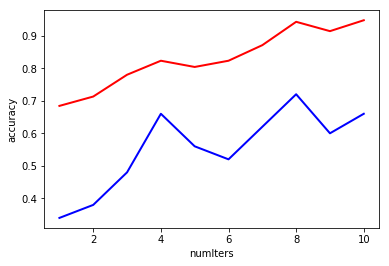

In [5]:
layerdims = [12288, 20, 7, 5, 1]
accTrains = []
accTests = []
for i in range(1, 31):
    para = bp.finalModel(trainX, trainY, layerdims, learningRate=0.0075,numIters=i*100, pringCost=False)
    predTrain, accTrain = bp.predict(trainX, trainY, para)
    predTest, accTest = bp.predict(testX, testY, para)
    accTrains.append(accTrain)
    accTests.append(accTest)

accTrains = np.array(accTrains)
accTests = np.array(accTests)

plt.plot(np.array(range(1, 31)), accTrains, label = "trainSet", color="red", linewidth=2)
plt.plot(np.array(range(1, 31)), accTests, label = "testSet", color="blue", linewidth=2)
plt.xlabel("numIters")
plt.ylabel("accuracy")

试试你自己的图片（模型比较简单，所以可能准确率并不高）

通过上图，可以确定最优训练次数numIters= ,我们现在据此训练最终的模型：

In [7]:
para = bp.finalModel(trainX, trainY, layerdims, learningRate=0.0075,numIters=2000, pringCost=True)

[[ 0.77174933]]
[[ 0.67205344]]
[[ 0.6482632]]
[[ 0.61150688]]
[[ 0.56704733]]
[[ 0.54013766]]
[[ 0.52792996]]
[[ 0.46547738]]
[[ 0.36912585]]
[[ 0.39174697]]
[[ 0.31518699]]
[[ 0.27269984]]
[[ 0.23741853]]
[[ 0.19960121]]
[[ 0.189263]]
[[ 0.16118855]]
[[ 0.1482139]]
[[ 0.13777488]]
[[ 0.12974018]]
[[ 0.12122535]]


Accuracy: 1.0
y = 1.0, 你的图片被预测为 "cat" .


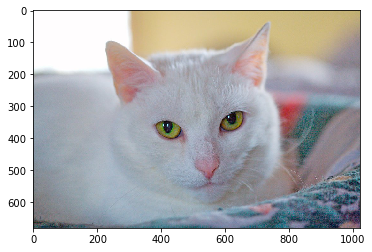

In [13]:
my_image = "my_image.jpg" 
my_label_y = [1] 

fname = "./" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64, 64)).reshape((64*64*3,1))
my_predicted_image, _ = bp.predict(my_image, my_label_y, para)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", 你的图片被预测为 \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" .")